In [2]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
from IPython import display

In [3]:
sample_freq = 44100

hz_conv = (1 / (44100))*np.pi*2

one_second_noise = np.random.rand(1*sample_freq)

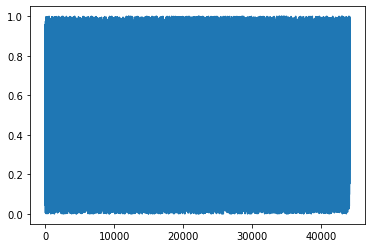

In [3]:
plt.plot(one_second_noise)

---
# Low pass

**Transfer function**

$ F_{lp}(z) = \frac{\alpha}{1 + (\alpha - 1)z^{-1}} $


In [68]:
def find_alpha(cutoff, sample_freq):
    
    T = 1 / sample_freq

    omega_c = -np.pi * 2 * cutoff * T
    
    alpha = np.cos(omega_c) - 1 + np.sqrt( np.cos(omega_c)**2 - 4*np.cos(omega_c) + 3 )
    
    return alpha

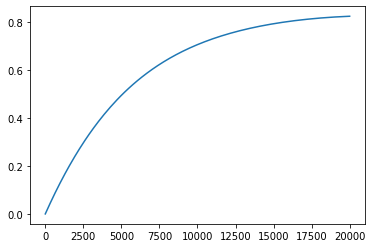

0.4954049872818431


In [43]:
cutoffs = np.logspace(np.log10(1),np.log10(20000),200)



alphas = find_alpha(cutoffs, 44100)

plt.plot(cutoffs, alphas)
plt.show()

alpha = find_alpha(5000, 44100)
print(alpha)

In [4]:
def low_pass_filter(signal, cutoff, sample_freq):
    
    T = 1 / sample_freq
    omega_c = -np.pi * 2 * cutoff * T
    
    alpha = np.cos(omega_c)  - 1 + np.sqrt( np.cos(omega_c)**2 - 4*np.cos(omega_c) + 3 )
    
    output = np.zeros(signal.shape)
    
    for n in range(1,len(signal)):
        output[n] = output[n - 1] + alpha*(signal[n] - output[n-1])
    
    return output

Mean of new signal
0.49261748907382225


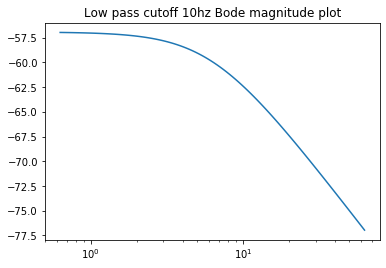

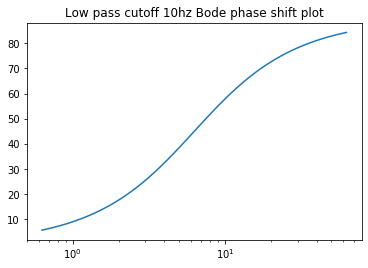

In [5]:
# my attempt at low pass

sample_freq = 44100

cutoff = 10 # hz

T = 1 / sample_freq

omega_c = np.pi * 2 * cutoff * T

alpha = np.cos(omega_c)  - 1 + np.sqrt( np.cos(omega_c)**2 - 4*np.cos(omega_c) + 3 )


num = [alpha] # numerator
denom = [(alpha-1),1] # denominator

w, mag, phase = signal.bode((num,denom))

w = w * (2 * np.pi)

# filter signal
lp_noise = low_pass_filter(one_second_noise, cutoff, sample_freq)

print("Mean of new signal")
print(np.mean(lp_noise))

# plot results
plt.figure()
plt.title("Low pass cutoff " + str(cutoff) + "hz Bode magnitude plot")
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.title("Low pass cutoff " + str(cutoff) + "hz Bode phase shift plot")
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [6]:
print("Unfiltered signal")
display.Audio(one_second_noise, rate = sample_freq)

Unfiltered signal


In [7]:
print("Filtered signal")
display.Audio(lp_noise, rate = sample_freq)

Filtered signal


---
# Inverse low pass
---

**Transfer function**

$ F_{invlp}(z) = \frac{1 + (\alpha - 1)z^{-1}}{\alpha} = \frac{z + (\alpha - 1)}{\alpha z}$

**Finding difference equation**

$\frac{Y}{X} = \frac{1 + (\alpha - 1)z^{-1}}{\alpha}$

$ Y = X \frac{1 + (\alpha - 1)z^{-1}}{\alpha} $

$ y[n] = ( x[n] + (\alpha - 1)x[-1] ) \frac{1}{\alpha} $



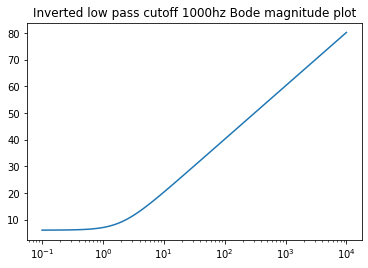

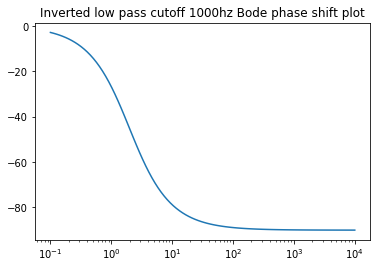

In [67]:
# inverse low pass

cutoff = 5000 # hz

T = 1 / sample_freq

omega_c = -np.pi * 2 * cutoff * T

alpha = np.cos(omega_c)  - 1 + np.sqrt( np.cos(omega_c)**2 - 4*np.cos(omega_c) + 3 )


denom = [alpha] 
num = [(alpha-1),1] 

w, mag, phase = signal.bode((num,denom))

# plot results
plt.figure()
plt.title("Inverted low pass cutoff 1000hz Bode magnitude plot")
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.title("Inverted low pass cutoff 1000hz Bode phase shift plot")
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

---
# Series
---

**Transfer function**
	
$F_{pair}(\alpha,\beta,z) = \frac{\alpha}{1 + (\alpha - 1)z^{-1}} \frac{1 + (\beta - 1)z^{-1}}{\beta}
	= \frac{\alpha(1 + (\beta - 1)z^{-1})}{\beta(1 + (\alpha - 1)z^{-1})}
    =\frac{\alpha + \alpha(\beta - 1)z^{-1}}{\beta + \beta(\alpha - 1)z^{-1}}$
    
$|F_{pair}(\alpha,\beta,0)| = |\frac{\alpha + \alpha(\beta - 1)}{\beta + \beta(\alpha - 1)}|= |\frac{\alpha \beta}{\alpha \beta}|$ = 1


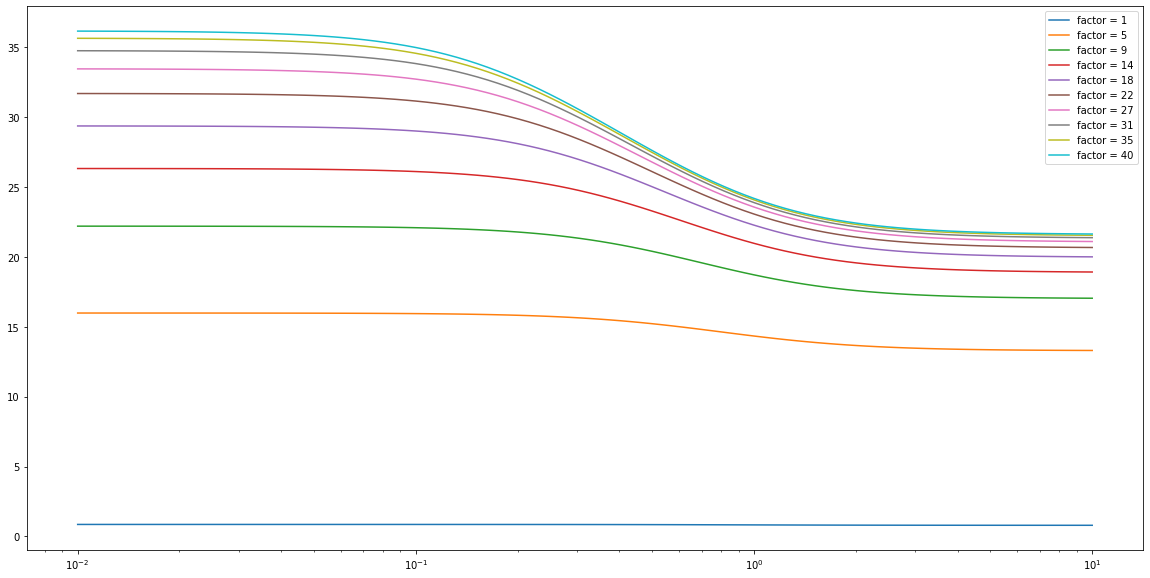

In [87]:
# my attempt at low pass inverse low pass series
factors = np.linspace(1.1,40,10)

plt.figure(figsize=(20,10))

for factor in factors:

    cutoff = 500 # hz

    alpha = find_alpha(cutoff, sample_freq)
    beta = find_alpha(cutoff*factor, sample_freq)

    denom = [alpha,alpha*(beta - 1)] 
    num = [beta,beta*(alpha - 1)] 

    w, mag, phase = signal.bode((num,denom))

    # plot results
    #plt.figure()
    #plt.title("Inverted low pass cutoff 1000hz Bode magnitude plot")
    plt.semilogx(w, mag, label = 'factor = ' + str(np.int(factor)))    # Bode magnitude plot
    #plt.figure()
    '''
    plt.title("Inverted low pass cutoff 1000hz Bode phase shift plot")
    plt.semilogx(w, phase)  # Bode phase plot
    plt.show()
    '''

plt.legend()
plt.show()

# Python emulation of C++ real time filter algorithm


### Low pass

Transfer function

$ F_{lp}(z) = \frac{\alpha}{1 + (\alpha - 1)z^{-1}} $

Difference equation

$ y_{lp}[n] = \alpha x[n] + (1 - \alpha) y_{lp}[n - 1] $

### Inverse low pass

Transfer function

$ F_{invlp}(z) = \frac{1 + (\alpha - 1)z^{-1}}{\alpha} = \frac{z + (\alpha - 1)}{\alpha z}$

Finding difference equation

$\frac{Y}{X} = \frac{1 + (\alpha - 1)z^{-1}}{\alpha}$

$ Y = X \frac{1 + (\alpha - 1)z^{-1}}{\alpha} $

$ y[n] = ( x[n] + (\alpha - 1)x[-1] ) \alpha^{-1} $

### Cutoff frequency and $\alpha$

Naive equation

$ \alpha_m = f_{c}  S^m  \frac{2  \pi}  {f_s}$

*where $m$ denotes the $m$:th filter in the series, and $S$ is the spread factor*

exact equation

$ \omega_c = f_{c} S^m \frac{2\pi}{f_s} $

$ \alpha_m = \cos(\omega_c)  - 1 + \big( \cos(\omega_c)^2 - \cos(\omega_c) + 3 \big)^{\frac{1}{2}}$





In [4]:
# constants
cut_off = 500
alphas = []
num_filter_pairs = 2
alpha = 0.0
    
output = 0.0
prev_output = 0.0
prev_lp_outputs = np.zeros((num_filter_pairs*2))
prev_inv_inputs = np.zeros((num_filter_pairs*2))
filter_input = 0.0
prev_input = 0.0
channel_shift = 0
sample_freq = 44100

num_channels = 2

In [5]:
audio_out = []

for spread_factor in [2,4,8,10]:
    print("now using spread factor = " + str(spread_factor))
    ########### constants ###########
    cut_off = 500
    alphas = []
    num_filter_pairs = 2
    alpha = 0.0

    output = 0.0
    prev_output = 0.0
    prev_lp_outputs = np.zeros((num_filter_pairs*2))
    prev_inv_inputs = np.zeros((num_filter_pairs*2))
    filter_input = 0.0
    prev_input = 0.0
    channel_shift = 0
    sample_freq = 44100

    num_channels = 2
    
    ##################################
    
    input_streams = np.random.rand(2,44100)*2 - 1

    output_streams = np.zeros(input_streams.shape)

    # run in separate function in C++ implementation
    for alpha_num in range(num_filter_pairs*2):
            alphas.append(cut_off * spread_factor**alpha_num * (np.pi*2 / sample_freq))


    # filter loop
    for channel in range(num_channels):

        channel_stream = output_streams[channel]

        channel_shift = num_filter_pairs * channel;

        # iterate over samples
        for sample in range(len(channel_stream)):

            for filter_pair in range(num_filter_pairs):

                ##################### LOW PASS SECTION #####################

                # fetch either plugin input or output from end of previous filter pair
                if (filter_pair == 0):

                    filter_input = input_streams[channel,sample]

                else:
                    filter_input = output

                alpha = alphas[filter_pair*2]

                # filter signal
                output = alpha*filter_input + (1 - alpha) * prev_lp_outputs[filter_pair + channel_shift];

                prev_lp_outputs[filter_pair + channel_shift] = output;

                ##################### INVERSE LOW PASS SECTION #####################

                filter_input = output;

                alpha = alphas[filter_pair*2 + 1]

                # filter signal
                output = ( filter_input + (alpha - 1) * prev_inv_inputs[filter_pair + channel_shift] ) / alpha

                prev_inv_inputs[filter_pair + channel_shift] = filter_input


            channel_stream[sample] = output

        output_streams[channel] = channel_stream

    audio_out.append(channel_stream)

#print("Filtered signal")
#display.Audio(output_streams, rate = sample_freq)

now using spread factor = 2
now using spread factor = 4
now using spread factor = 8


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars


now using spread factor = 10


In [6]:
print("Unfiltered signal")
display.Audio(input_streams, rate = sample_freq)

Unfiltered signal


In [7]:
print("Filtered signal spread = 2")
display.Audio(audio_out[0], rate = sample_freq)

Filtered signal spread = 2


In [8]:
print("Filtered signal spread = 4")
display.Audio(audio_out[1], rate = sample_freq)

Filtered signal spread = 4


In [9]:
print("Filtered signal spread = 8")
display.Audio(audio_out[2], rate = sample_freq)

Filtered signal spread = 8


In [10]:
print("Filtered signal spread = 10")
display.Audio(audio_out[3], rate = sample_freq)

Filtered signal spread = 10
